In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

Examining the above graph, a curve is noticed in the data as Speed and Power increase. There is a strong concentration of vectors in the bottom left: 0-8 for Speed and 0-10 for Power. Furthermore, there is a concentration in the top right: 17-35 for Speed and 90-110 for Power. Infact it appears from simply looking at the plot that the majority of the vectors of the dataset are located in these two zones.

The dispersion of datapoints will be further explored to examine the relationship. This relationship could be explained by a particular phenomenon that occurs when producing power from wind resources. 

For now, the plot is enough to assume that simple linear regression may not be appropriate for this dataset.

Nevertheless we will carry out Simple Linear Regression on this dataset.

In [ ]:
Plot_2 = plt.plot(power, speed, '.')
plt.xlabel("Power")
plt.ylabel("Speed")

coeffs = np.polyfit(power, speed, 1)

plt.plot(power, coeffs[0] * power + coeffs[1], '-')

Plot_2


In [21]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

In [22]:
#columns = “age sex bmi map tc ldl hdl tch ltg glu”.split()
p = pd.read_csv("powerproduction.txt")
df = pd.DataFrame(p)

In [23]:
df = p[["speed", "power"]]

train, test = train_test_split(df, test_size=0.2, random_state=42, 
                               shuffle=True)

In [24]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

***

In [25]:
power = df["power"]
power = power.values.reshape(500, 1)

speed = df["speed"]
speed = speed.values.reshape(500,1)


model = LinearRegression()
model.fit(power, speed)

LinearRegression()

In [26]:
df.values.target

AttributeError: 'numpy.ndarray' object has no attribute 'target'

In [27]:
r_sq = model.score(power, speed)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7289360258564073


In [36]:
#Split the dataset into Training set and Test Set
x_train, x_test, y_train, y_test = train_test_split(df, 
                                    test_size= 0.2, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [500, 20]

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1,1)

In [31]:
prediction_x_test = model.predict(x_test)
prediction_x_test[:3]

array([76.69230769, 82.3956044 , 88.0989011 ])

In [32]:
print("x_train: ", "\n")
print(x_train[:3])

print("x_test: ", "\n")
print(x_test[:3])

print("y_train: ", "\n")
print(y_train[:3])

print("y_test: ", "\n")
print(y_test[:3])

x_train:  

[[0]
 [1]
 [2]]
x_test:  

[[13]
 [14]
 [15]]
y_train:  

[[ 5]
 [12]
 [11]]
y_test:  

[[73]
 [89]
 [84]]


Text(0, 0.5, 'Predictions')

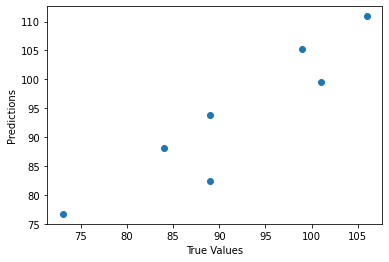

In [33]:
plt.scatter(y_test, prediction_x_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [34]:
print(model.score(x_test, y_test))

0.788952065940988
